<a href="https://colab.research.google.com/github/mhridhay/SentimentAnalysisOfAirlineCustomersUsingTweets/blob/master/Text%20Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 8070 - Survey of Machine Learning
# Topic: Airline Customer Sentiment Analysis using Tweets


# Python Libraries


In [0]:
#@title Install non-generic libraries
!pip install vaderSentiment
!pip install pyLDAvis

In [0]:
#@title Importing Libraries
from __future__ import print_function

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
nltk.download('stopwords')

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from wordcloud import WordCloud,STOPWORDS

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

# Sentiment Analysis
import textblob as tb
from textblob.sentiments import NaiveBayesAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis

In [0]:
#@title Upload files
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [0]:
#@title Data setup
df = pd.read_csv("Tweets.csv")

In [0]:
#@title Nulls & NA's
((len(df)-df.count())/len(df))*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

Text(0.5, 0, 'Tweet Sentiments')

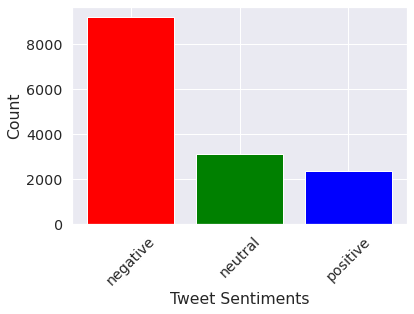

In [0]:
#@title Tweet Sentiment Summary
Mood_count=df['airline_sentiment'].value_counts()
Index = [1,2,3]
plt.bar(Index,Mood_count, color = ['red', 'green', 'blue'])
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Count')
plt.xlabel('Tweet Sentiments')

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


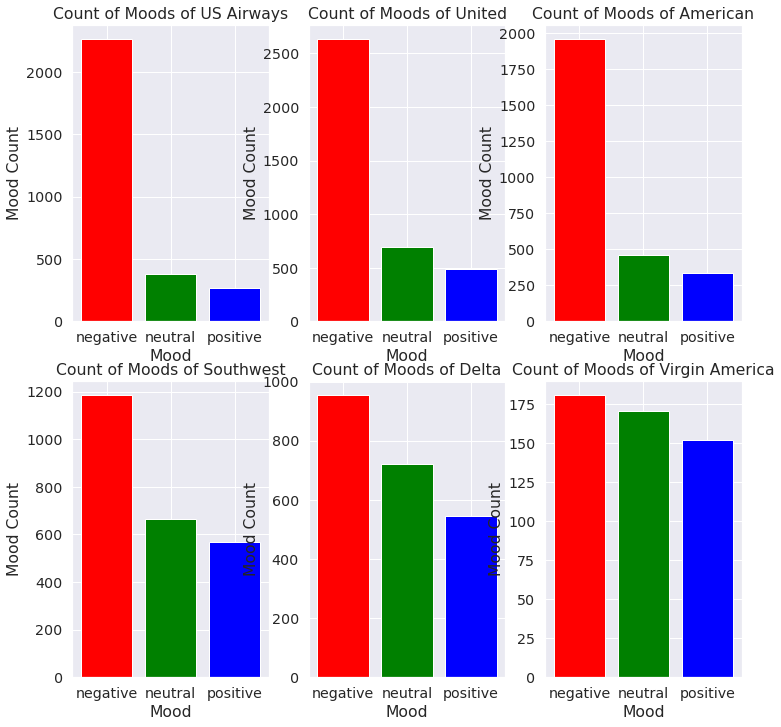

In [0]:
#@title Tweets by Airline

print("Total number of tweets for each airline \n ", df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']

plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

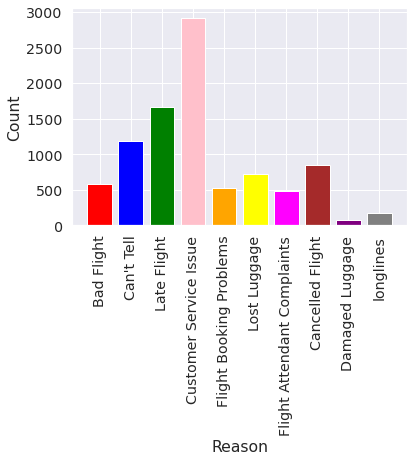

In [0]:
#@title Negative Reasons
NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        df2=df
    else:
        df2=df[df['airline']==Airline]
    count=dict(df['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count, color= ['red', 'blue', 'green', 'pink', 'orange', 'yellow', 'magenta', 'brown', 'purple', 'gray'])
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
plot_reason('All')

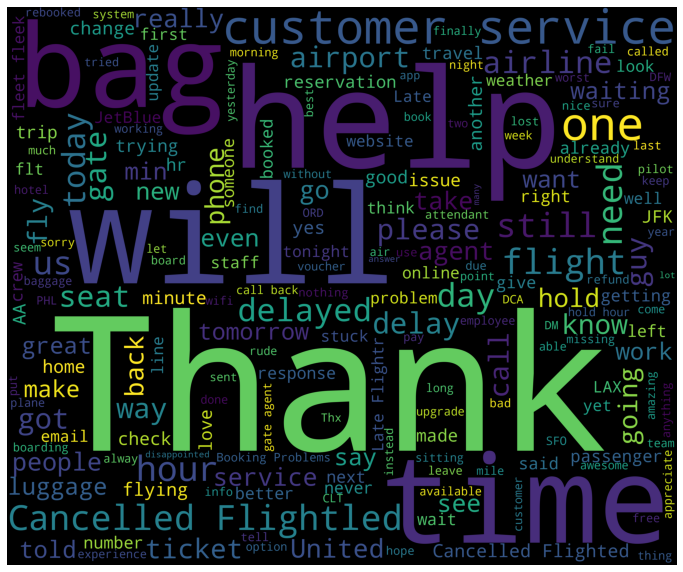

In [0]:
#@title Negative Tweets WordCloud
from wordcloud import WordCloud,STOPWORDS
stop_words_list = list(STOPWORDS)
stop_words_list.append("flight")
stop_words_list.append("plane")
stop_words_list.append("now")
stop_words_list.append("amp")
df3=df[df['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=stop_words_list,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

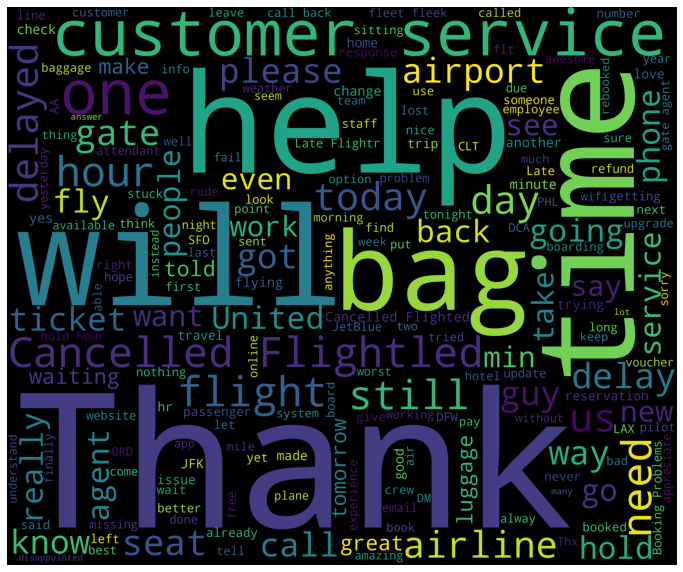

In [0]:
#@title Positive Tweets WordCloud
from wordcloud import WordCloud,STOPWORDS
stop_words_list = list(STOPWORDS)
stop_words_list.append("flight")
stop_words_list.append("plane")
stop_words_list.append("now")
stop_words_list.append("amp")
df3=df[df['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=stop_words_list,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
#@title Cleaning
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
del df['tweet_id']
del df['name']
del df['retweet_count']
del df['tweet_location']
del df['user_timezone']
del df['tweet_created']
print(df.shape)
# i have 6 columns to work with now
# creating new columns for sentiment analysis
df['sent_tb'] = 0
df['tb_p'] = 0
df['tb_n'] = 0
df['sent_vader'] = 0
df['vader_p'] = 0
df['vader_n'] = 0
df.head(1) # tweet is in column index 5

(14640, 6)


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,text,sent_tb,tb_p,tb_n,sent_vader,vader_p,vader_n
0,neutral,1.0,NaN,NaN,Virgin America,@VirginAmerica What @dhepburn said.,0,0,0,0,0,0


# Sentiment Analysis

## Machine Learning Techniques

In [0]:
#@title TF-IDF as corpus
Tweet = pd.read_csv("Tweets.csv")
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)
# new added with TF IDF Vectorizer
# Create matrix based on word frequency in tweets
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_clean_tweet)
X_test = vectorizer.transform(test_clean_tweet)
## new added with TF IDF Vectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    MultinomialNB()]
dense_features=X_train.toarray()
dense_test= X_test.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(X_train,train['sentiment'])
        pred = fit.predict(X_test)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print(classifier.__class__.__name__)
    print(classification_report(test['sentiment'], pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1889
           1       0.00      0.00      0.00      1039

    accuracy                           0.65      2928
   macro avg       0.32      0.50      0.39      2928
weighted avg       0.42      0.65      0.51      2928



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1889
           1       0.59      0.76      0.67      1039

    accuracy                           0.73      2928
   macro avg       0.72      0.74      0.72      2928
weighted avg       0.76      0.73      0.73      2928

SVC
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1889
           1       1.00      0.03      0.06      1039

    accuracy                           0.66      2928
   macro avg       0.83      0.52      0.42      2928
weighted avg       0.78      0.66      0.53      2928

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1889
           1       0.59      0.65      0.62      1039

    accuracy                           0.72      2928
   macro avg       0.69      0.70      0.70      2928
weighted avg       0.72   

In [0]:
#@title Count Vectorizer as corpus
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    MultinomialNB()]
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report
from sklearn import metrics

dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print(classifier.__class__.__name__)
    print(classification_report(test['sentiment'], pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1889
           1       0.00      0.00      0.00      1039

    accuracy                           0.65      2928
   macro avg       0.32      0.50      0.39      2928
weighted avg       0.42      0.65      0.51      2928



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.84      0.45      0.58      1889
           1       0.46      0.85      0.59      1039

    accuracy                           0.59      2928
   macro avg       0.65      0.65      0.59      2928
weighted avg       0.71      0.59      0.59      2928

SVC
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      1889
           1       0.77      0.40      0.53      1039

    accuracy                           0.74      2928
   macro avg       0.75      0.67      0.68      2928
weighted avg       0.75      0.74      0.72      2928

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1889
           1       0.66      0.66      0.66      1039

    accuracy                           0.76      2928
   macro avg       0.73      0.74      0.74      2928
weighted avg       0.76   

## Sentiment Tools in Python

In [0]:
#@title Simple TextBlob Analyzer
cutoff_sent =  0#@param {type:"number"}

for i in range(df.shape[0]):
  #Pick a review
  rev = str(df.iloc[i,5])

  # TextBlob Sentiment Analyzer
  df.iloc[i,6] = tb.TextBlob(rev).sentiment.polarity

  # Pessimistic approach, neutral sentiment => bad review
  if df.iloc[i,6] > cutoff_sent:
    df.iloc[i,7] = 1
  else:
    df.iloc[i,8] = 1

In [0]:
#@title VADER Analyzer
cutoff_sent =  0#@param {type:"number"}

for i in range(df.shape[0]):
  # Pick a review
  rev = str(df.iloc[i,5])

  # VADER Sentiment Analyzer
  analyzer = SentimentIntensityAnalyzer()
  vs = analyzer.polarity_scores(rev)
  score = vs['compound']
  neg = vs['neg']
  pos = vs['pos']
  neu = vs['neu']
  if (neg > 0.01):
    # negatives (vader_n)
    df.iloc[i,11] = 1
  else:
    # positives (vader_p)
    df.iloc[i,10] = 1

In [0]:
#@title Sentiment summary
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df = df.reset_index()
pd.pivot_table(df, values='index', index=['airline_sentiment'], columns=['vader_p'], aggfunc='count')

vader_p,0,1
airline_sentiment,,
0,6032,3146
1,1059,4403


In [0]:
#@title Brand-wise Sentiments
review_sentiment = df.groupby('airline').agg({'sent_tb':['mean'], 
                                                 'tb_p':['sum'],
                                                 'tb_n':['sum'],
                                                 'sent_vader':['mean'],
                                                 'vader_p':['sum'],
                                                 'vader_n':['sum']}).reset_index()
review_sentiment.columns = ['airline', 'avg_sent_tb', 'tb_p', 'tb_n', 'avg_sent_vader', 'vader_p', 'vader_n']
review_sentiment

,airline,avg_sent_tb,tb_p,tb_n,avg_sent_vader,vader_p,vader_n
0,American,0.035153,984,1775,0,1314,1445
1,Delta,0.105082,971,1251,0,1367,855
2,Southwest,0.092860,999,1421,0,1442,978
3,US Airways,-0.001823,932,1981,0,1274,1639
4,United,0.026427,1366,2456,0,1828,1994
5,Virgin America,0.132209,225,279,0,324,180


# Topic Modeling

In [0]:
#@title Gensim
import spacy
nlp = spacy.load('en_core_web_sm')

data = df.text.values.tolist()
num_topics =  10#@param {type:"integer"}

from nltk.stem import PorterStemmer
lemma = WordNetLemmatizer()
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
def clean_text(text):
    # Convert the text into lowercase
    lower = text.lower()
    # Split into list
    wordList = lower.split()
    # Remove punctuation
    wordList_punc = ["".join(i for i in word if (i=="'")|(i not in string.punctuation)) for word in wordList]
    # Remove stopwords
    wordList_stop = [word for word in wordList_punc if word not in list(spacy_stopwords)]
    # Remove other keywords
    #wordList_key = [word for word in wordList_stop if word not in keywords]
    # Stemming
    words_stemmed = [PorterStemmer.stem(word) for word in wordList_stop]
    # Lemmatisation
    #lemma_word = nlp(wordList)
    wordList_clean = [lemma.lemmatize(word) for word in wordList_key]
    #wordList = [word.lemma_ for word in wordList]
    return " ".join(wordList_clean)

import numpy
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Stop Words
custom_stop_words = stopwords.words('english')
custom_stop_words.extend(['plane', 'flight','from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub(r'\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub(r'\s+', ' ', sent)  # remove newline chars
        sent = re.sub(r"\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

def process_words(texts, stop_words=custom_stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]   
    # Remove other keywords
    #texts_out = [[word for word in simple_preprocess(str(doc)) if word not in keywords] for doc in texts_out]
    return texts_out

# Convert to list

data_words = list(sent_to_words(data))

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

data_ready = process_words(data_words)



# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency using BOW model
corpus = [id2word.doc2bow(text) for text in data_ready]

#Using Tfidf - replace corpus with corpus_tfidf
from gensim import corpora, models
#tfidf = models.TfidfModel(corpus)
#corpus_tfidf = tfidf[corpus]

#corpus = [id2word.doc2bow(text) for text in data_ready]
# Build LDA model
#Nmf(corpus_tfidf, num_topics=50, kappa=0.1, eval_every=5) #NMF
lda_model = gensim.models.ldamodel.LdaModel(
                corpus=corpus,
                id2word=id2word,
                num_topics=num_topics, 
                random_state=100,
                update_every=1,
                chunksize=10,
                passes=10,
                alpha='symmetric',
                iterations=100,
                per_word_topics=True)

def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
  # Init output
  sent_topics_df = pd.DataFrame()

  # Get main topic in each document
  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list            
    # print(row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:  # => dominant topic
        wp = ldamodel.show_topic(topic_num)
        topic_keywords = ", ".join([word for word, prop in wp])
        sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

  # Add original text to the end of the output
  contents = pd.Series(texts)
  sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
  return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
  sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                          grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                          axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8714,"hour, wait, hold, ticket, hang, info, tonight, new, reason, full","[drink, ticket, hook, wait, first, international]"
1,1.0,0.8875,"agent, tell, bag, work, co, passenger, rebooke, people, really, check","[century, drawing, tourist, french, coast, co, gxdqortss]"
2,2.0,0.8500,"time, fly, morning, talk, understand, drive, appreciate, different, start, fault","[dig, swanky, mood, lighting, singer]"
3,3.0,0.8200,"tomorrow, weather, today, change, send, board, speak, feel, priority, trip","[narrowly, standby, snag, trip]"
4,4.0,0.8714,"customer, service, phone, leave, reservation, number, online, answer, airline, find","[service, embarrassment, customer, worldwide, shameonyou, usairwayssuck]"
5,5.0,0.8714,"call, guy, next, back, put, airport, response, keep, email, give","[guy, jack, price, price, lower, smh]"
6,6.0,0.9100,"way, ever, experience, poor, baggage, dme, update, employee, cool, human","[social, business, develop, intelligent, path, embed, social, enterprise, ragandisney]"
7,7.0,0.8500,"help, day, luggage, sit, issue, home, due, never, gate, load","[power, power, insufficient, outlet, roadwarrior]"
8,8.0,0.8714,"still, crew, minute, let, great, ask, suck, buy, catering, member","[ask, tea, tea, coffee, gold, coffee]"
9,9.0,0.8714,"cancel, flightle, delay, bad, seat, amp, book, late, flighted, rebook","[cancel, cavalli, calf, interfere, onboard, equipment]"


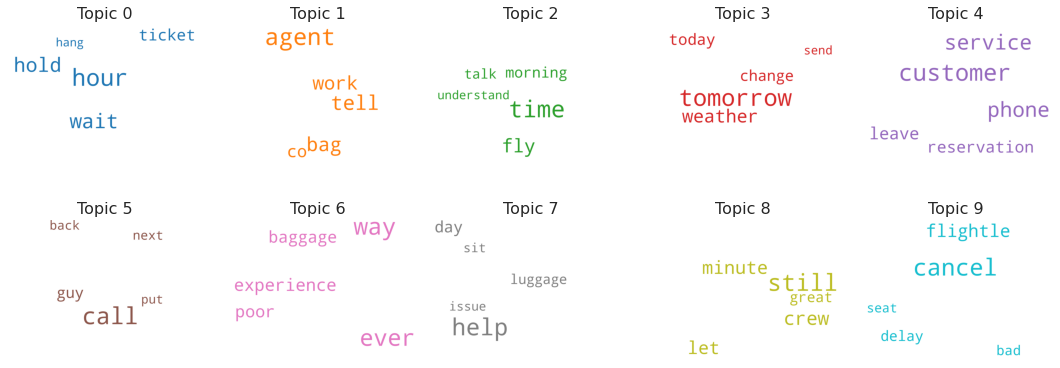

In [0]:
#@title Word Cloud of Top Words
max_words = 5 #@param {type:"integer"}
# Wordcloud of Top N words in each topic

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cloud = WordCloud(stopwords=custom_stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=max_words,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(num_topics=num_topics,num_words=max_words,formatted=False)
columns= math.ceil(num_topics/2)
rows = 2
fig, axes = plt.subplots(rows, columns, figsize=(3*columns,3*rows), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
  if i < num_topics:
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
#@title pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.391678 -0.134452       1        1  12.031193
1      0.050367 -0.039555       2        1  11.796926
4      0.073165 -0.159415       3        1  10.898752
5      0.159627 -0.291755       4        1  10.568876
7      0.035995  0.124404       5        1  10.408933
8     -0.004843  0.119754       6        1   9.679332
0     -0.069299  0.116060       7        1   9.596551
3      0.027739  0.118912       8        1   8.626307
2      0.069774  0.059826       9        1   8.467498
6      0.049152  0.086222      10        1   7.925632, topic_info=               Term         Freq        Total Category  logprob  loglift
89             call  1504.000000  1504.000000  Default  30.0000  30.0000
61             help  1463.000000  1463.000000  Default  29.0000  29.0000
246          cancel  1543.000000  1543.000000  Default  28.0000  28.0000
37             hour  1024.000000  1024.000000  Default  27.0000  27.0000
415        tomorrow   929.000000   929.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
925            luck    43.862309    44.644112  Topic10  -4.9509   2.5174
1327       previous    43.073521    43.857681  Topic10  -4.9691   2.5170
592   inconvenience    42.349781    43.131889  Topic10  -4.9860   2.5168
2675     horrendous    48.918495    51.470749  Topic10  -4.8418   2.4842
1182        neglect    69.643562    82.110886  Topic10  -4.4886   2.3704

[338 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5609      4  0.069380  aadvantage
5609      6  0.013876  aadvantage
5609      9  0.874183  aadvantage
5609     10  0.013876  aadvantage
93        4  0.985051        able
...     ...       ...         ...
104       8  0.986235       worry
470       4  0.990235       wrong
135       3  0.991173        year
356       1  0.992551   yesterday
45        6  0.991090         yet

[320 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 5, 6, 8, 9, 1, 4, 3, 7])